In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics, preprocessing
from sklearn.ensemble import RandomForestClassifier


In [7]:
df = pd.read_csv("C:/Users/VANSH/Downloads/archive/corporate_rating.csv")

In [8]:
df

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,BBB,"NVR, Inc.",NVR,Moody's Investors Service,9/5/2012,Capital Goods,11.757767,7.115059,7.057420,1.079762,...,0.343500,0.953231,50.293155,230.194971,1.759461,0.086376,15.867701,52.760726,0.083018,15.758348
2025,BB,Kaiser Aluminum Corporation,KALU,Standard & Poor's Ratings Services,4/28/2016,Capital Goods,2.962788,1.294743,0.428234,30.602414,...,0.363636,0.602645,5.563630,5.958956,1.614282,-0.267117,-4.729967,9.232021,0.114089,14.542373
2026,B,Cresud S.A.C.I.F. y A.,CRESY,Fitch Ratings,11/30/2012,Finance,0.883875,0.842553,0.233830,147.599371,...,35.017544,0.926665,1.459801,1.056480,4.034952,0.265092,9.358311,1.575328,0.283634,2.300168
2027,B,Cresud S.A.C.I.F. y A.,CRESY,Fitch Ratings,6/15/2012,Finance,0.911713,0.748356,0.310640,131.644566,...,0.331525,0.692804,0.744377,1.470201,3.825856,0.130692,22.440102,1.074441,0.217783,1.997608


In [9]:
df.isnull().sum()

Rating                                0
Name                                  0
Symbol                                0
Rating Agency Name                    0
Date                                  0
Sector                                0
currentRatio                          0
quickRatio                            0
cashRatio                             0
daysOfSalesOutstanding                0
netProfitMargin                       0
pretaxProfitMargin                    0
grossProfitMargin                     0
operatingProfitMargin                 0
returnOnAssets                        0
returnOnCapitalEmployed               0
returnOnEquity                        0
assetTurnover                         0
fixedAssetTurnover                    0
debtEquityRatio                       0
debtRatio                             0
effectiveTaxRate                      0
freeCashFlowOperatingCashFlowRatio    0
freeCashFlowPerShare                  0
cashPerShare                          0


In [10]:
df = df.drop(['Date','Sector','Rating Agency Name','Symbol','Name'], axis=1)

In [11]:
df

,Rating,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,BBB,11.757767,7.115059,7.057420,1.079762,0.056706,0.086376,1.000000,0.077844,0.069328,...,0.343500,0.953231,50.293155,230.194971,1.759461,0.086376,15.867701,52.760726,0.083018,15.758348
2025,BB,2.962788,1.294743,0.428234,30.602414,-0.169983,-0.267117,0.198649,-0.248509,-0.189265,...,0.363636,0.602645,5.563630,5.958956,1.614282,-0.267117,-4.729967,9.232021,0.114089,14.542373
2026,B,0.883875,0.842553,0.233830,147.599371,-0.007458,0.000219,0.384390,0.185418,-0.002066,...,35.017544,0.926665,1.459801,1.056480,4.034952,0.265092,9.358311,1.575328,0.283634,2.300168
2027,B,0.911713,0.748356,0.310640,131.644566,0.087365,0.130692,0.414916,0.286236,0.021251,...,0.331525,0.692804,0.744377,1.470201,3.825856,0.130692,22.440102,1.074441,0.217783,1.997608


In [12]:
df.info(())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Rating                              2029 non-null   object 
 1   currentRatio                        2029 non-null   float64
 2   quickRatio                          2029 non-null   float64
 3   cashRatio                           2029 non-null   float64
 4   daysOfSalesOutstanding              2029 non-null   float64
 5   netProfitMargin                     2029 non-null   float64
 6   pretaxProfitMargin                  2029 non-null   float64
 7   grossProfitMargin                   2029 non-null   float64
 8   operatingProfitMargin               2029 non-null   float64
 9   returnOnAssets                      2029 non-null   float64
 10  returnOnCapitalEmployed             2029 non-null   float64
 11  returnOnEquity                      2029 no

In [13]:
df.describe()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
count,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,...,2029.000000,2029.000000,2.029000e+03,2.029000e+03,2029.000000,2029.000000,2029.000000,2.029000e+03,2029.000000,2029.000000
mean,3.529607,2.653986,0.667364,333.795606,0.278447,0.431483,0.497968,0.587322,-37.517928,-73.974193,...,0.397572,0.409550,5.094719e+03,4.227549e+03,3.323579,0.437454,48.287985,6.515123e+03,1.447653,38.002718
std,44.052361,32.944817,3.583943,4447.839583,6.064134,8.984982,0.525307,11.224622,1166.172220,2350.275719,...,10.595075,3.796488,1.469156e+05,1.224000e+05,87.529866,8.984299,529.118961,1.775290e+05,19.483294,758.923588
min,-0.932005,-1.893266,-0.192736,-811.845623,-101.845815,-124.343612,-14.800817,-124.343612,-40213.178290,-87162.162160,...,-100.611015,-120.916010,-4.912742e+03,-1.915035e+01,-2555.419643,-124.343612,-3749.921337,-1.195049e+04,-4.461837,-76.662850
25%,1.071930,0.602825,0.130630,22.905093,0.021006,0.025649,0.233127,0.044610,0.019176,0.028112,...,0.146854,0.271478,4.119924e-01,1.566038e+00,2.046822,0.028057,6.238066,2.356735e+00,0.073886,2.205912
50%,1.493338,0.985679,0.297493,42.374120,0.064753,0.084965,0.414774,0.107895,0.045608,0.074421,...,0.300539,0.644529,2.131742e+00,3.686513e+00,2.652456,0.087322,9.274398,4.352584e+00,0.133050,5.759722
75%,2.166891,1.453820,0.624906,59.323563,0.114807,0.144763,0.849693,0.176181,0.077468,0.135036,...,0.370653,0.836949,4.230253e+00,8.086152e+00,3.658331,0.149355,12.911759,7.319759e+00,0.240894,9.480892
max,1725.505005,1139.541703,125.917417,115961.637400,198.517873,309.694856,2.702533,410.182214,0.487826,2.439504,...,429.926282,34.594086,5.753380e+06,4.786803e+06,2562.871795,309.694856,11153.607090,6.439270e+06,688.526591,20314.880400


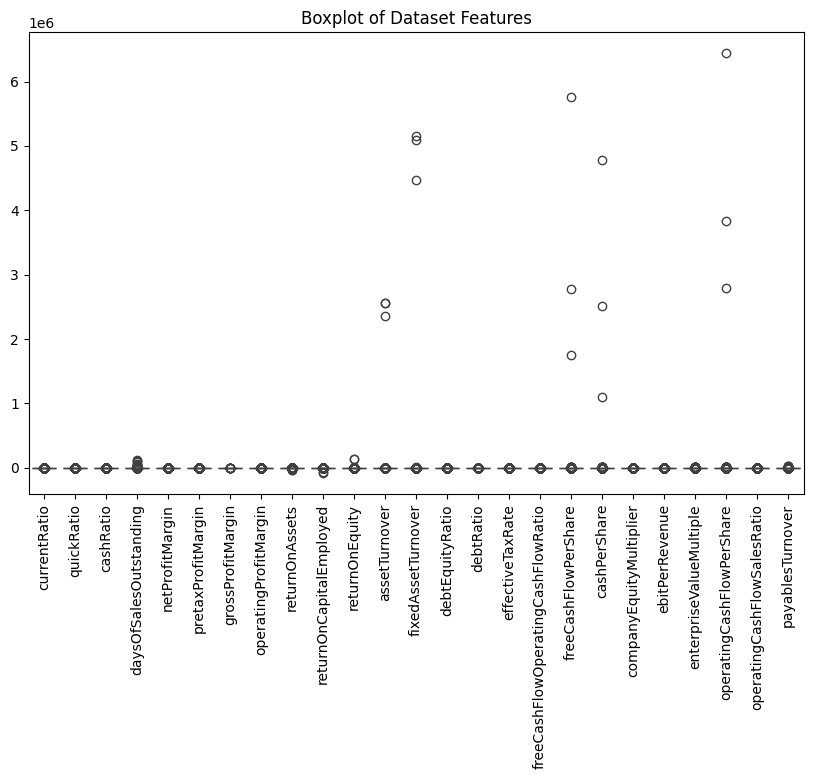

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Boxplot of Dataset Features')
plt.show()

In [15]:
df.isnull().sum()

Rating                                0
currentRatio                          0
quickRatio                            0
cashRatio                             0
daysOfSalesOutstanding                0
netProfitMargin                       0
pretaxProfitMargin                    0
grossProfitMargin                     0
operatingProfitMargin                 0
returnOnAssets                        0
returnOnCapitalEmployed               0
returnOnEquity                        0
assetTurnover                         0
fixedAssetTurnover                    0
debtEquityRatio                       0
debtRatio                             0
effectiveTaxRate                      0
freeCashFlowOperatingCashFlowRatio    0
freeCashFlowPerShare                  0
cashPerShare                          0
companyEquityMultiplier               0
ebitPerRevenue                        0
enterpriseValueMultiple               0
operatingCashFlowPerShare             0
operatingCashFlowSalesRatio           0


In [16]:
df_na = df.dropna()
print(df_na.shape)

(2029, 26)


In [17]:
df_na['Rating'].value_counts()

Rating
BBB    671
BB     490
A      398
B      302
AA      89
CCC     64
AAA      7
CC       5
C        2
D        1
Name: count, dtype: int64

In [18]:
df_na.Rating.unique()

array(['A', 'BBB', 'AA', 'BB', 'B', 'CCC', 'D', 'CC', 'AAA', 'C'],
      dtype=object)

In [19]:

mapping = {
    "AAA":1,
    "AA":2,
    "A":3,
    "BBB":4,
    "BB":5,
    "B":6,
    "CCC":7,
    "CC":8,
    "C":9
}

In [20]:
df_na['Rating_numerical'] = df_na['Rating'].map(mapping)

In [21]:
df_na['Rating_numerical']

0       3.0
1       4.0
2       4.0
3       4.0
4       4.0
       ... 
2024    4.0
2025    5.0
2026    6.0
2027    6.0
2028    7.0
Name: Rating_numerical, Length: 2029, dtype: float64

In [22]:
df_na

,Rating,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,...,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,Rating_numerical
0,A,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,...,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655,3.0
1,BBB,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,...,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846,4.0
2,BBB,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,...,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510,4.0
3,BBB,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,...,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150,4.0
4,BBB,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,...,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,BBB,11.757767,7.115059,7.057420,1.079762,0.056706,0.086376,1.000000,0.077844,0.069328,...,0.953231,50.293155,230.194971,1.759461,0.086376,15.867701,52.760726,0.083018,15.758348,4.0
2025,BB,2.962788,1.294743,0.428234,30.602414,-0.169983,-0.267117,0.198649,-0.248509,-0.189265,...,0.602645,5.563630,5.958956,1.614282,-0.267117,-4.729967,9.232021,0.114089,14.542373,5.0
2026,B,0.883875,0.842553,0.233830,147.599371,-0.007458,0.000219,0.384390,0.185418,-0.002066,...,0.926665,1.459801,1.056480,4.034952,0.265092,9.358311,1.575328,0.283634,2.300168,6.0
2027,B,0.911713,0.748356,0.310640,131.644566,0.087365,0.130692,0.414916,0.286236,0.021251,...,0.692804,0.744377,1.470201,3.825856,0.130692,22.440102,1.074441,0.217783,1.997608,6.0


In [23]:
df = df_na.drop('Rating', axis=1)

In [24]:
df = df.dropna()


In [25]:
df_vc = pd.DataFrame(df['Rating_numerical']).value_counts()
df_vc

Rating_numerical
4.0                 671
5.0                 490
3.0                 398
6.0                 302
2.0                  89
7.0                  64
1.0                   7
8.0                   5
9.0                   2
Name: count, dtype: int64

In [26]:
from imblearn.over_sampling import ADASYN

X1 = df.drop('Rating_numerical', axis=1)
y1 = df['Rating_numerical']

minority_class_samples = y1.value_counts().min()

n_neighbors = min(5, minority_class_samples - 1)

adasyn = ADASYN(n_neighbors=n_neighbors)
X_resampled, y_resampled = adasyn.fit_resample(X1, y1)

balanced_df = pd.concat([X_resampled, y_resampled], axis=1)

balanced_df


,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,Rating_numerical
0,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,0.091514,...,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655,3.0
1,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,0.104800,...,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846,4.0
2,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,0.075955,...,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510,4.0
3,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,-0.027015,...,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150,4.0
4,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,0.096945,...,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6182,1.145544,0.659064,0.609441,2.373829,0.736482,0.920530,0.654737,0.107495,0.213041,0.462964,...,-1.661064,-1.160745,7.170750,7.980152,0.920530,7.546859,0.638591,0.023517,6.947341,9.0
6183,1.284156,0.636201,0.579070,3.626405,0.453898,0.725536,0.517794,0.099251,0.069305,0.396322,...,-1.526193,-0.936246,5.827067,5.671389,0.725536,8.078509,0.538866,0.022321,9.436997,9.0
6184,1.424196,0.613102,0.548386,4.891880,0.168404,0.528535,0.379440,0.090922,-0.075912,0.328992,...,-1.389933,-0.709435,4.469547,3.338849,0.528535,8.615633,0.438113,0.021113,11.952291,9.0
6185,1.270603,0.638436,0.582040,3.503935,0.481527,0.744602,0.531183,0.100057,0.083358,0.402837,...,-1.539380,-0.958196,5.958445,5.897126,0.744602,8.026527,0.548616,0.022438,9.193573,9.0


In [27]:
df['Rating_numerical'].isnull().sum()

0

In [28]:
balanced_df['Rating_numerical'].value_counts()

Rating_numerical
5.0    768
3.0    722
6.0    706
1.0    672
4.0    671
8.0    670
9.0    670
2.0    661
7.0    647
Name: count, dtype: int64

In [29]:
X = balanced_df.iloc[:,0:-1].values
y = balanced_df.iloc[:,-1].values

In [30]:
X_df1 = pd.DataFrame(X, columns=df.iloc[:,0:-1].columns)
X_df1

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,0.091514,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,0.104800,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,0.075955,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,-0.027015,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,0.096945,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6182,1.145544,0.659064,0.609441,2.373829,0.736482,0.920530,0.654737,0.107495,0.213041,0.462964,...,0.169945,-1.661064,-1.160745,7.170750,7.980152,0.920530,7.546859,0.638591,0.023517,6.947341
6183,1.284156,0.636201,0.579070,3.626405,0.453898,0.725536,0.517794,0.099251,0.069305,0.396322,...,0.264452,-1.526193,-0.936246,5.827067,5.671389,0.725536,8.078509,0.538866,0.022321,9.436997
6184,1.424196,0.613102,0.548386,4.891880,0.168404,0.528535,0.379440,0.090922,-0.075912,0.328992,...,0.359932,-1.389933,-0.709435,4.469547,3.338849,0.528535,8.615633,0.438113,0.021113,11.952291
6185,1.270603,0.638436,0.582040,3.503935,0.481527,0.744602,0.531183,0.100057,0.083358,0.402837,...,0.255211,-1.539380,-0.958196,5.958445,5.897126,0.744602,8.026527,0.548616,0.022438,9.193573


In [54]:
print(y)
df.iloc[3].values

[3. 4. 4. ... 9. 9. 9.]


array([ 1.01985072e+00,  5.10401779e-01,  1.76115611e-01,  4.11617379e+01,
        2.08936030e-02, -1.28576020e-02,  1.38058502e-01,  4.24300870e-02,
        2.56900070e-02, -2.70148580e-02,  9.32791200e-02,  1.22956327e+00,
        6.01740812e+00,  2.63094953e+00,  7.24589948e-01,  1.81666667e+00,
       -1.47169811e-01, -1.01562500e+00,  1.44401042e+01,  3.63094953e+00,
       -1.28576020e-02,  4.08074074e+00,  6.90104167e+00,  2.83938710e-02,
        4.58115034e+00,  4.00000000e+00])

In [32]:
from sklearn.preprocessing import StandardScaler

X_df = pd.DataFrame(X)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled_data,
                         columns=df.iloc[:,0:-1].columns)
X_scaled.shape

(6187, 25)

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

pca.fit(X_scaled)

pca_data = pca.transform(X_scaled)
pca_df = pd.DataFrame(pca_data,columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

In [34]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.291070,-0.126550,-0.039197,-0.261196,0.069615,0.142134,0.261385,0.278527,-0.263309,0.018134
1,0.307764,-0.126545,-0.036946,-0.237446,0.086401,0.134231,0.122915,0.324813,-0.289322,-0.000577
2,0.292277,-0.127136,-0.039314,-0.257962,0.068231,0.144880,0.260669,0.292410,-0.268346,0.023020
3,0.283538,-0.129519,-0.039731,-0.276143,0.079436,0.169587,0.354622,0.203443,-0.226762,0.260075
4,0.291962,-0.125065,-0.039158,-0.252577,0.069078,0.140785,0.259463,0.282950,-0.264042,0.014436
...,...,...,...,...,...,...,...,...,...,...
6182,0.170127,0.043891,-0.050814,-0.136263,-0.063330,-0.110773,1.179411,-0.479568,0.223673,-0.001086
6183,0.128277,-0.001724,-0.056546,-0.176965,-0.030094,-0.051971,1.583277,-0.451824,0.196485,0.025189
6184,0.085995,-0.047809,-0.062337,-0.218087,0.003484,0.007436,1.991302,-0.423795,0.169016,0.051735
6185,0.132369,0.002736,-0.055986,-0.172986,-0.033344,-0.057720,1.543789,-0.454537,0.199143,0.022620


In [35]:
X_scaled = pca_df.iloc[:,:].values
X_scaled.shape

(6187, 10)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0, test_size=0.2, shuffle=True, stratify=y)

In [37]:
from sklearn.metrics import  accuracy_score, classification_report
def print_performances(name, classifier, X_train, y_train, X_test, y_test):
    y_predict_train = classifier.predict(X_train)
    y_predict_test = classifier.predict(X_test)
    print(name + '\n - Train accuracy: ' + str(round(accuracy_score(y_train, y_predict_train) * 100, 1)) + '%')
    print(' - Test accuracy: '+ str(round(accuracy_score(y_test, y_predict_test) * 100, 1)) + '%')
    print('\nTest '+str(classification_report(y_test, y_predict_test)))

In [44]:
rfc = RandomForestClassifier(n_estimators = 500,max_depth=10,max_features=4)
rfc.fit(X_train, np.ravel(y_train))
print_performances('Random Forest Classifier', rfc, X_train, y_train, X_test, y_test)

Random Forest Classifier
 - Train accuracy: 88.5%
 - Test accuracy: 69.4%

Test               precision    recall  f1-score   support

         1.0       0.94      1.00      0.97       135
         2.0       0.69      0.77      0.73       132
         3.0       0.43      0.56      0.49       145
         4.0       0.34      0.27      0.30       134
         5.0       0.52      0.42      0.47       154
         6.0       0.55      0.48      0.51       141
         7.0       0.78      0.83      0.80       129
         8.0       0.99      0.99      0.99       134
         9.0       1.00      1.00      1.00       134

    accuracy                           0.69      1238
   macro avg       0.69      0.70      0.69      1238
weighted avg       0.69      0.69      0.69      1238



In [ ]:
rfc.predict([[1.03355902,  0.49823374,  0.2031204 , 38.99115563,  0.04406202,
        0.04885716,  0.17571528,  0.0665459 ,  0.05320381,  0.1048    ,
        0.16795288,  1.20747555,  6.1719829 ,  2.1567831 ,  0.68322182,
        0.07415485,  0.54199683,  8.62547289, 17.40226986,  3.1567831 ,
        0.04885716,  6.46061822, 15.91424968,  0.06723853,  4.00284605,
        4.       ]])

ValueError: X has 26 features, but RandomForestClassifier is expecting 10 features as input.

In [ ]:
import pickle

def predict_with_pca(input_features):
    # Load the trained PCA model from the file
    with open('pca_model.pkl', 'rb') as file:
        pickle.dump(file)

    # Load the trained RandomForestClassifier model from the file
    with open('rf_model.pkl', 'rb') as file:
        rf_model = pickle.load(file)

    # Transform input features into 10 principal components
    input_pca = pca_model.transform(input_features.reshape(1, -1))

    # Make predictions using the RandomForestClassifier model
    predicted_rating = rf_model.predict(input_pca)

    return predicted_rating[0]


In [48]:
from joblib import dump

# Assuming pca_model and rf_model are your trained models
dump(pca, 'C:/Users/VANSH/Downloads/archive/pca_model.joblib')
dump(rfc, 'C:/Users/VANSH/Downloads/archive/rf_model.joblib')

['C:/Users/VANSH/Downloads/archive/rf_model.joblib']

In [49]:
from joblib import load
import numpy as np

def predict_with_pca(input_features):
    
    pca_model = load('pca_model.joblib')

    
    rf_model = load('rf_model.joblib')

    
    input_pca = pca_model.transform(input_features.reshape(1, -1))

    
    predicted_rating = rf_model.predict(input_pca)

    return predicted_rating[0]

In [52]:
lst = [[ 1.01985072e+00,  5.10401779e-01,  1.76115611e-01,  4.11617379e+01,
        2.08936030e-02, -1.28576020e-02,  1.38058502e-01,  4.24300870e-02,
        2.56900070e-02, -2.70148580e-02,  9.32791200e-02,  1.22956327e+00,
        6.01740812e+00,  2.63094953e+00,  7.24589948e-01,  1.81666667e+00,
       -1.47169811e-01, -1.01562500e+00,  1.44401042e+01,  3.63094953e+00,
       -1.28576020e-02,  4.08074074e+00,  6.90104167e+00,  2.83938710e-02,
        4.58115034e+00       ]
arr = np.array(lst)
predict_with_pca(arr)

c:\Users\VANSH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


ValueError: X has 26 features, but PCA is expecting 25 features as input.